In [74]:
from KC_methods import methods, datasets, calc_KC76
import pandas as pd
import numpy as np
from logistic_maps import generate_logistic, SAMPLES,logistic_map, to_bin, discretize
from collections import Counter
import matplotlib.pyplot as plt

In [75]:
def calc_SB(probability_values,complexities):
     df = pd.DataFrame({"y":probability_values,'x':complexities})
     groupmax = df.groupby('x').max().reset_index()
     return np.polyfit(groupmax['x'],np.log10(groupmax['y']),1);

In [76]:
def generate_patterns_range(iterations,epsilon=0,e_freq=0,r=-1):

    '''Return list of patterns  from random `r` and `x_0`. patterns are of length `iterations`
        If r parameter is provided it will use that as the initial value of r, otherwise it will be random.
    
    '''
    r_is_random = r == -1

    r_is_list = isinstance(r,list)

    low = 0
    high = 4
    if r_is_list:
        low, high = r
    patterns = [''] *(SAMPLES) 
    # patterns = np.empty(SAMPLES,dtype='object')
    for i in range(SAMPLES):
        if (r_is_random):
            r = np.random.uniform(0,4)
        elif r_is_list:
            r = np.random.uniform(low,high)
        x_0 = np.random.rand()
        mapp = logistic_map(x_0,r,iterations,epsilon=epsilon,e_freq=e_freq)
        patterns[i] = to_bin(discretize(mapp))
    return patterns

def generate_logistic(iterations,start_iteration=0,epsilon=0,e_frequency=0,r=-1):
    ''' Wrapper function for logicstic map generation with kick.

    Parameters:
        `iterations`: the number of iterations that will be taken into account, this will determine the length of the pattern.
        `start_iteration`: after what iteration to start observing the pattern. defaults to `0`.
        `epsilon`: The magnitude of the random kick applied, when 0.5 is passed, the kick will be between -0.5,0.5. default to 0
        `e_frequency`: Nonnegative number determining the frequency of the kick. defaults to 0.
                       If the number is in the range [0,1), this is a probability.
    '''
                       # Otherwise it represents the frequency of the kick (1 means every time, 2 means every two time [nokick,kick,nokick,kick]) NOT IMPLEMENTED
    patterns = generate_patterns_range(start_iteration+iterations,epsilon=epsilon,e_freq=e_frequency,r=r)
    patterns = [ pattern[start_iteration:] for pattern in patterns]
    return patterns

In [77]:
n_iterations = 25
start_iteration=0
epsilon = 0.0
e_frequency = 0.0
r =-1

In [78]:
# for n_iterations in [5,20,25,50,100,150,200]:
n_iterations = 25

C:\Users\m7mdk\AppData\Local\Temp\ipykernel_14572\2295319605.py:30: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([min(probability_values)/1.7,0])


[0, 0.0, 0.0, -1]


C:\Users\m7mdk\AppData\Local\Temp\ipykernel_14572\2295319605.py:30: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([min(probability_values)/1.7,0])


[0, 0.0, 0.0, -1]


C:\Users\m7mdk\AppData\Local\Temp\ipykernel_14572\2295319605.py:30: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([min(probability_values)/1.7,0])


[0, 0.0, 0.0, -1]


C:\Users\m7mdk\AppData\Local\Temp\ipykernel_14572\2295319605.py:30: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([min(probability_values)/1.7,0])


[0, 0.0, 0.0, -1]


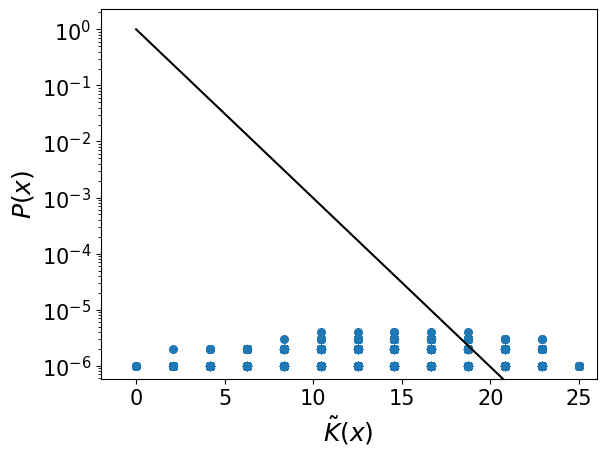

In [79]:

for start_r in [0,3,3.57,4]:
    patterns = generate_logistic(n_iterations,start_iteration=start_iteration,epsilon=epsilon,e_frequency=e_frequency,r=[start_r,4])
    probability = Counter(patterns)
    probability = {k: v/SAMPLES for k,v in probability.items()}
    probability_values =  list(probability.values())
    # method = calc_KC76
    complexities = list(map(calc_KC76,probability.keys()))
    K = np.array(complexities)
    K_scaled = n_iterations * ( K-min(K) ) / ( max(K)-min(K) )

    K_scaled = np.round(K_scaled,2)
    slope, intercept = calc_SB(probability_values,complexities)
    plt.clf()
    # plt.gca().set_aspect('equal')
    plt.semilogy(K_scaled,probability_values,'o',ms=5, markeredgewidth=1.5)
    plt.xlabel(r'$\tilde{K}(x)$',fontsize=18)
    plt.ylabel(r'$P(x)$',fontsize=18)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    x = np.arange(0,n_iterations,1)
    # y = np.log10([max(probability_values),min(probability_values)])
    k = 1/(2**(x))
    # offset = abs(min(log_probabilities)-min(k))
    # if (k[1] > y[1]):
    #     offset = - offset
    # y_k = k + offset

    # plt.plot(x,y,c="k",label='fit')
    plt.plot(x,k,c='k',label=r"$2^{-k}$")
    plt.ylim([min(probability_values)/1.7,0])
    plt.xlim([-2,n_iterations+1])
    # plt.plot(x,y_k-offset,c='green',label=r"$2^{-k}$")
    # plt.legend(loc="upper right")
    # plt.title(f"start={start_iteration}, eps={epsilon}, e_freq={e_frequency}, r={'random' if r == -1 else r}, KC_method={method}")
    # plt.xlabel(r'$\mathit{\tilde{K}_{%s}(x)}$' % method,fontsize=15)
    # plt.ylim([0.5*1/SAMPLES,1])
    plt.savefig(f"results/r_ranges/{start_r}.jpg",bbox_inches = "tight")
    row = [ start_iteration,epsilon,e_frequency,r]
    print(row)